In [5]:
# https://www.youtube.com/watch?v=kz_NJERCgm8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

###
# LSTM, 


In [6]:
df = pd.read_csv("./data.csv", )


df = df.iloc[::-1]

df = df.set_index(pd.DatetimeIndex(df["Unix.Timestamp"].values))



In [7]:
df = df.tail(1000)

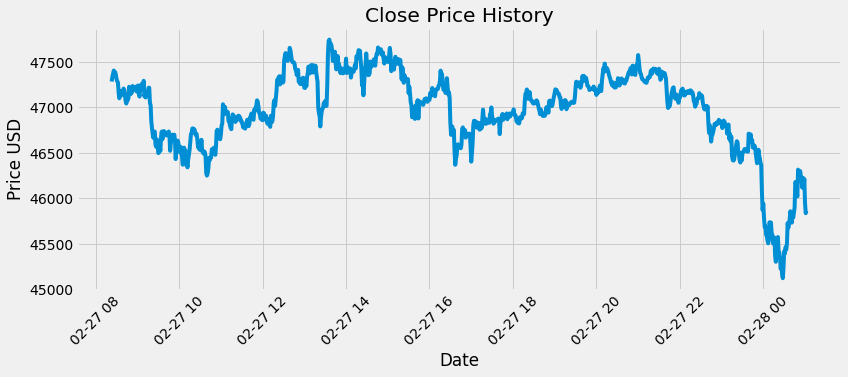

In [8]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df["Close"], label = "Close")
plt.xticks(rotation=45)
plt.title("Close Price History")
plt.xlabel("Date")
plt.ylabel("Price USD")
plt.show()




In [11]:
import plotly.express as px
fig = px.line(df, x="Unix.Timestamp", y="Close", title="Testing")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [90]:
#calculate macd
ShortEMA = df.Close.ewm(span=13, adjust=False).mean()

LongEMA = df.Close.ewm(span=29, adjust=False).mean()

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

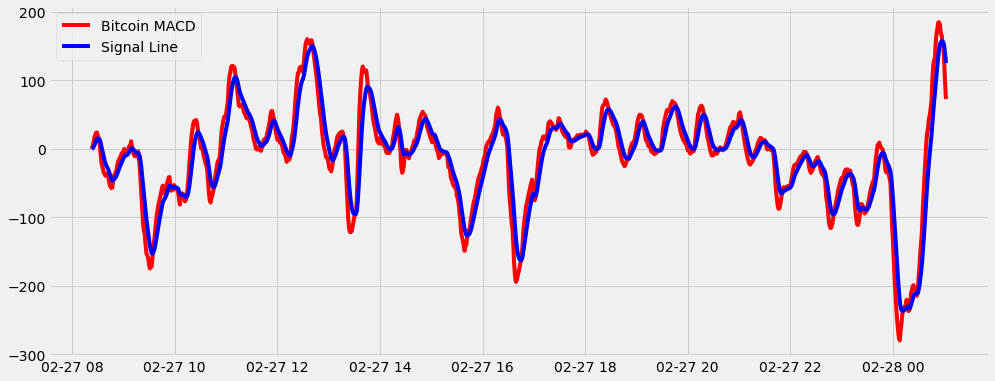

In [91]:
plt.figure(figsize=(15,6))
plt.plot(df.index, MACD, label="Bitcoin MACD", color="red")
plt.plot(df.index, signal, label="Signal Line", color="blue")
plt.legend(loc="upper left")
plt.show()


In [92]:
df["MACD"] = MACD
df["Signal Line"] = signal

In [93]:
#function to buy and sell based on lines
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = 0

    for i in range(0, len(signal)):
        if signal["MACD"][i] > signal["Signal Line"][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal["Close"][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal["MACD"][i] < signal["Signal Line"][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal["Close"][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Sell.append(np.nan)
            Buy.append(np.nan)
    return(Buy, Sell)



In [94]:
a = buy_sell(df)
df["Buy_Signal_price"] = a[0]
df["Sell_Signal_price"] = a[1]



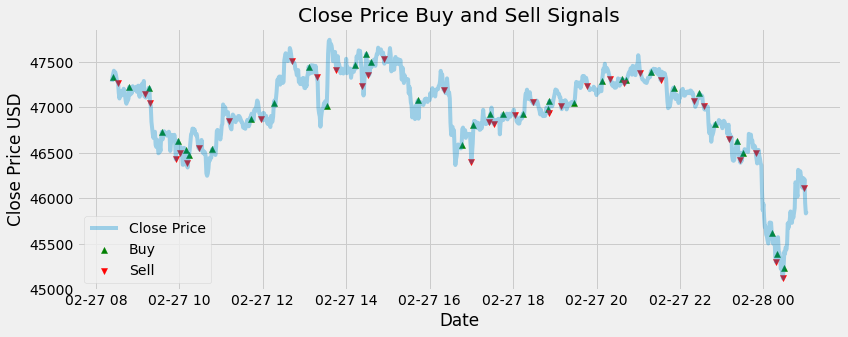

In [95]:
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index, df["Buy_Signal_price"], color = "green", label="Buy", marker = "^", alpha=1)
plt.scatter(df.index, df["Sell_Signal_price"], color = "red", label="Sell", marker = "v", alpha=1)
plt.plot(df["Close"], label = "Close Price", alpha = 0.35)
plt.title("Close Price Buy and Sell Signals")
plt.xlabel("Date")
plt.ylabel("Close Price USD")
plt.legend(loc = "lower left")
plt.show()

In [96]:
# lav funktion som om at der blev købt og solgt til den pris
# - Hvornår købes der? Til hvad? Hvor meget købes der?
# - samme med salg
# Hvad er profit over en tidsperiode?
value = 1000
for idx in range(0, len(df["Close"])):
    if not np.isnan(df["Buy_Signal_price"].iloc[idx]):
        buy_price = df["Buy_Signal_price"].iloc[idx]
        value = value/buy_price
        print(f"Buy at {buy_price}. Value = {value}")
    elif not np.isnan(df["Sell_Signal_price"].iloc[idx]):
        sell_price = df["Sell_Signal_price"].iloc[idx]
        value = value*sell_price
        print(f"Sell at {sell_price}. Value = {value}")
    else:
        close = df["Close"].iloc[idx]
        print(f"No action: {value}. Close: {close}")

    



No action: 1000. Close: 47280.92
Buy at 47332.23. Value = 0.021127253036672896
No action: 0.021127253036672896. Close: 47365.65
No action: 0.021127253036672896. Close: 47402.09
No action: 0.021127253036672896. Close: 47375.69
No action: 0.021127253036672896. Close: 47385.14
No action: 0.021127253036672896. Close: 47355.03
No action: 0.021127253036672896. Close: 47306.9
No action: 0.021127253036672896. Close: 47283.69
Sell at 47270.77. Value = 998.701519028366
No action: 998.701519028366. Close: 47158.09
No action: 998.701519028366. Close: 47096.73
No action: 998.701519028366. Close: 47159.97
No action: 998.701519028366. Close: 47173.64
No action: 998.701519028366. Close: 47129.76
No action: 998.701519028366. Close: 47178.1
No action: 998.701519028366. Close: 47148.85
No action: 998.701519028366. Close: 47204.0
No action: 998.701519028366. Close: 47191.69
No action: 998.701519028366. Close: 47132.23
No action: 998.701519028366. Close: 47071.05
No action: 998.701519028366. Close: 47039.1

In [97]:

1000/df["Buy_Signal_price"].iloc[1]

0.021127253036672896